importing

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns

loading

In [2]:
data = pd.read_csv(r"C:\Users\dimas\OneDrive\Studying Data\Bank Customer Churn Prediction.csv")

taking a look at the dataset overall

In [3]:
print(data.info,data.dtypes,data.shape)
data.head()

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


changing types into more acceptable ones

In [4]:
data = data.astype({'credit_card': 'bool', 'active_member': 'bool', 'churn': 'bool', 'country': 'category','customer_id':'category','products_number':'category'})

finding out if genders are imbalanced(and would be possible to convert column into the boolean in case of need),there is not(data is not considered Big,so that level difference is neglected

finding out if there are many duplicated id's(disproven to be so)

In [5]:
data['customer_id'].nunique()

10000

In [6]:
data['gender'].value_counts()/len(data['gender'])

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

checking for missing values

<AxesSubplot:>

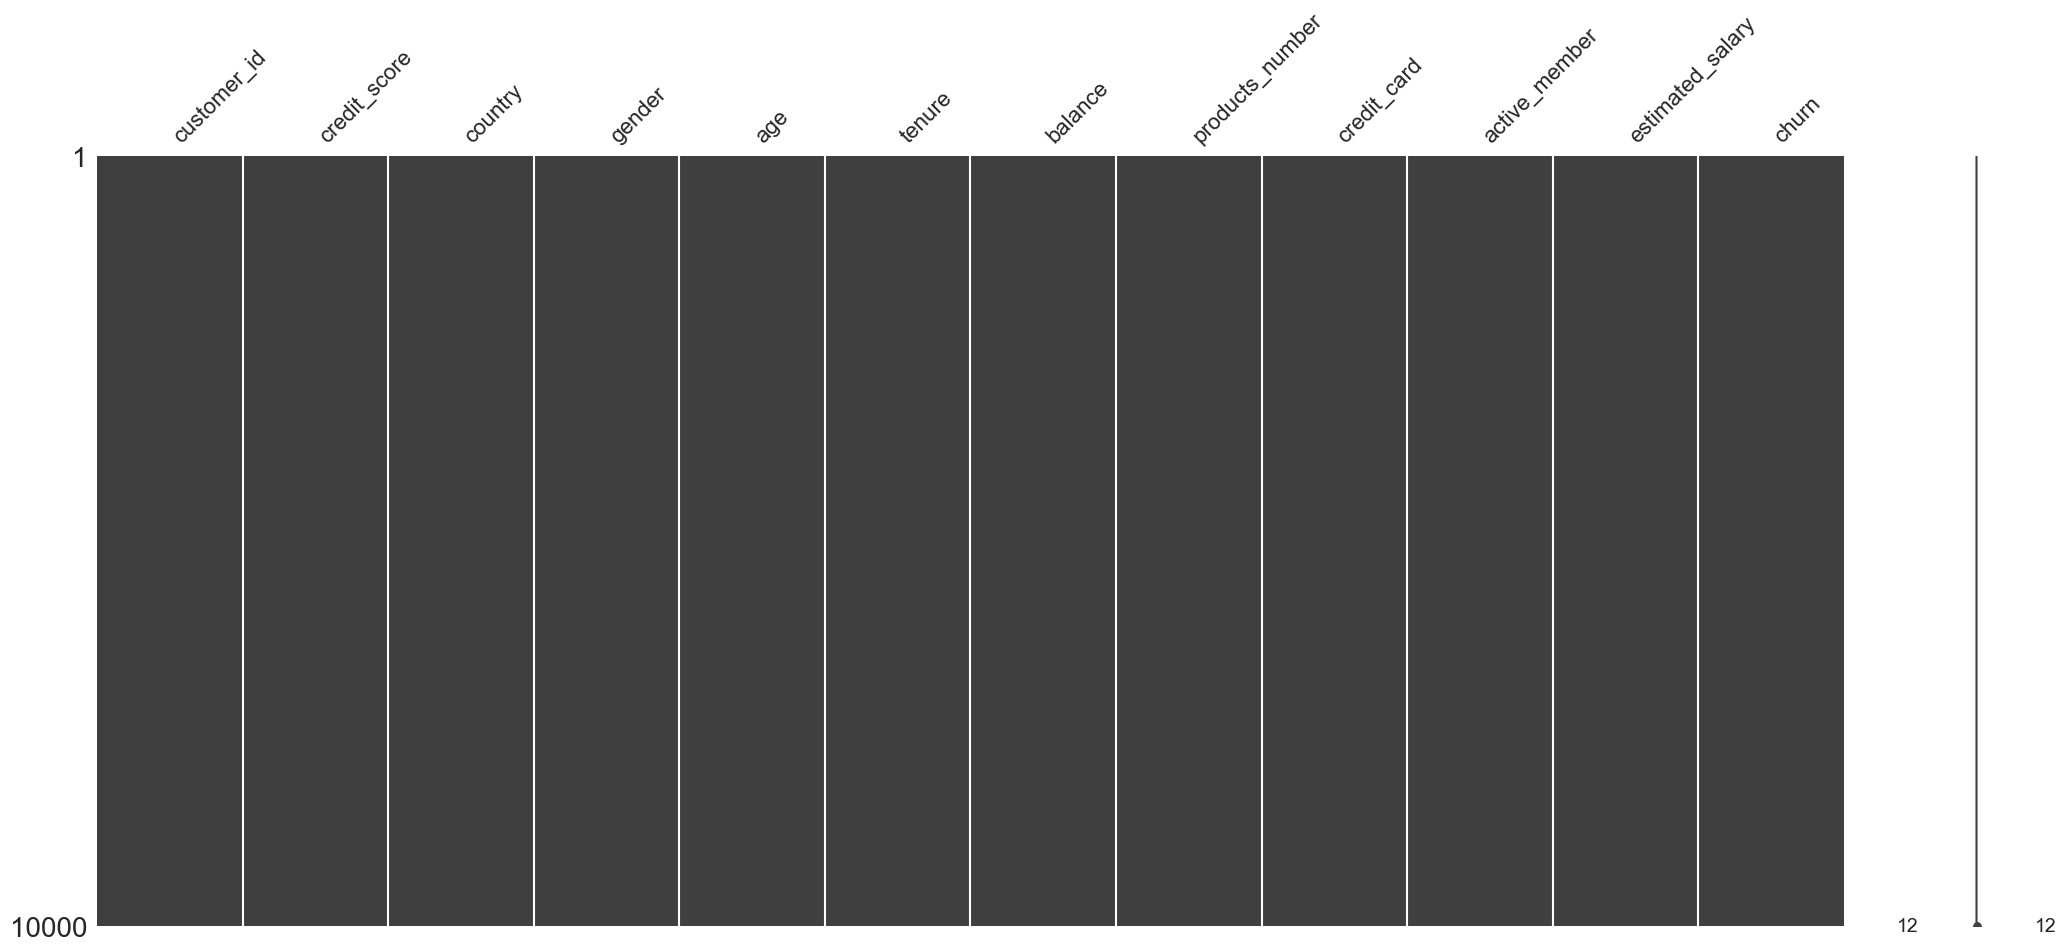

In [7]:
msno.matrix(data)

searching for multicollinearity between variables(there is zero to none)

<AxesSubplot:>

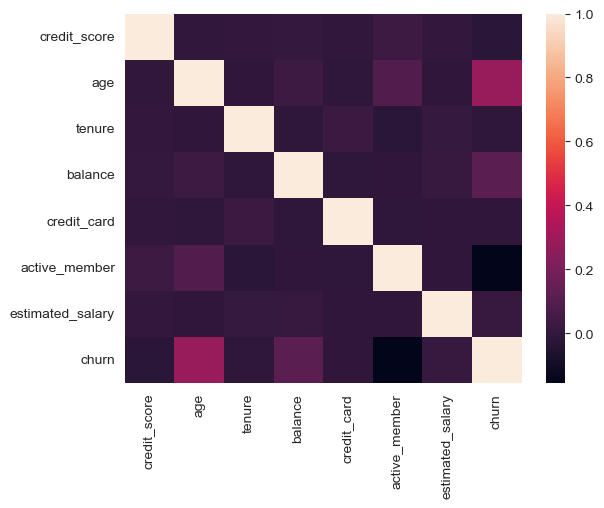

In [8]:
sns.heatmap(data.corr())

visualizing distributions.Now we can see that there is a big group that quits within one year(we will proceed with it later),after that comes the group of main interest(long-term clients),and the last group where churn percent gets higher again)

count     10000
unique        4
top           1
freq       5084
Name: products_number, dtype: int64

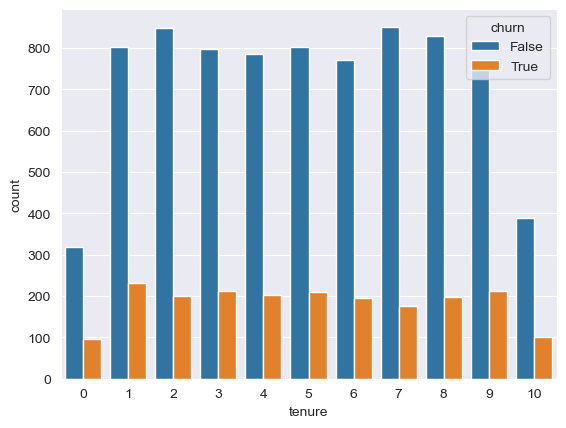

In [9]:
sns.countplot(data=data,x='tenure',hue='churn')
data['products_number'].describe()

If we had the information,I would try to find patterns between type of product used,way of conversion and one-year quitters,but there is no data
Now we will try to find out wht group of customers are quitting the most.As it turns out,our most quitting group with around-zero balance.

<AxesSubplot:xlabel='balance', ylabel='Density'>

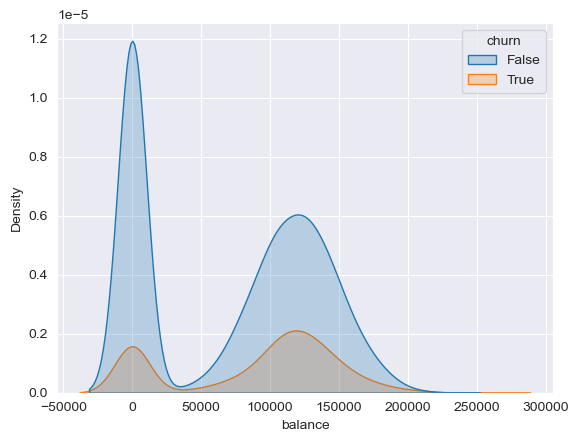

In [10]:
sns.kdeplot(data=data,x='balance',hue='churn',shade=True)

Now we search for unusualties in distributions,and interesting tendencies.As results:
Customers with lower credit score are more likely to churn throughout the years.Assumptions:
a) might be typical reaction as seeing any credit experience as negative
b) some CRM changes should be proposed?

<AxesSubplot:xlabel='tenure', ylabel='credit_score'>

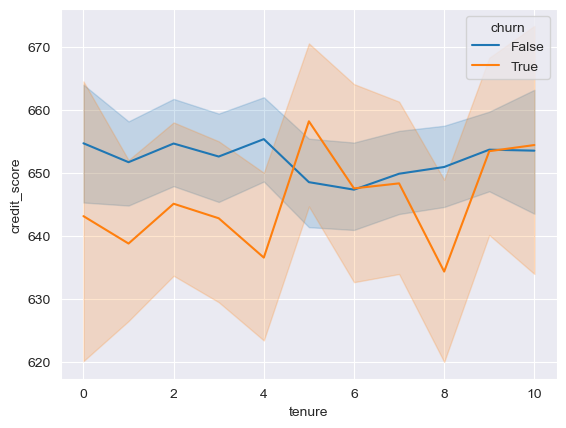

In [11]:
sns.lineplot(data=data,x='tenure',y=data['credit_score'],hue='churn')

 Distributions of credit scores by product numbers could be considered 'intuitively normal',with no decrease or increase with the change of used products amount.Churn distributions are pretty similar(except the one for the'four products')

<AxesSubplot:xlabel='products_number', ylabel='credit_score'>

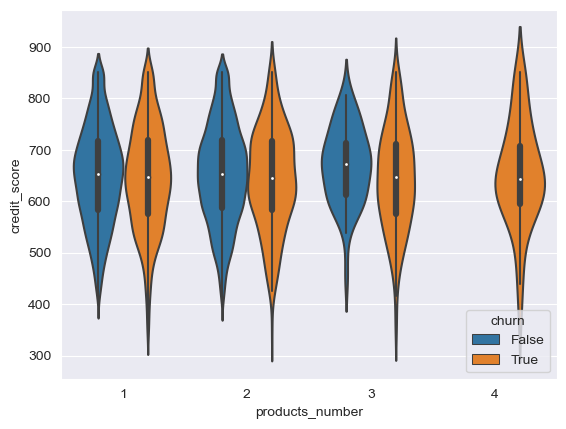

In [12]:
sns.violinplot(data=data,x='products_number',y='credit_score',hue='churn')

balance follows typical bimodal distribution with two peaks(might be the class gap).According to the plot,upper-class clients tend to churn more than lower.Assumptions:
a)older people churn for natural reasons
b)customers are dissatisfied with a certain product,which certain group of people(by age,because it's relationship with balance is the strongest)mostly obtain

<AxesSubplot:xlabel='products_number', ylabel='balance'>

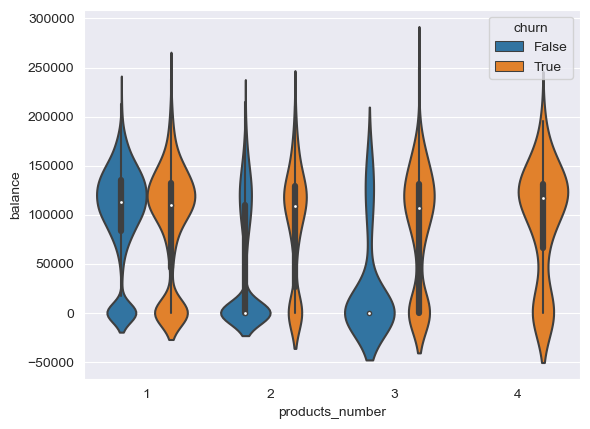

In [13]:
sns.violinplot(data=data,x='products_number',y='balance',hue='churn')

Customers with credit card are less likely to churn.Assumption-credit card policies are not the main reason for quitting,and card approval policies could be looked into(as in the matter of card approval mechanisms)

<AxesSubplot:xlabel='credit_card', ylabel='count'>

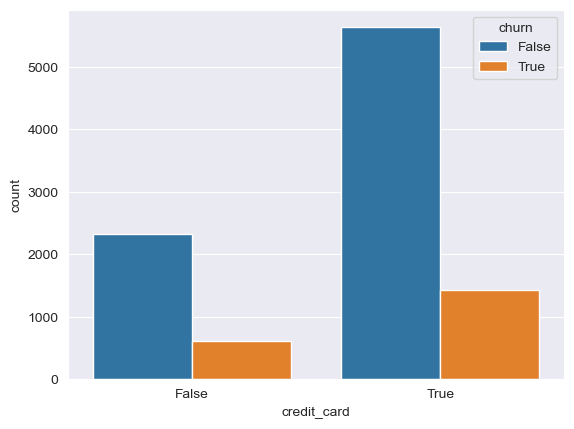

In [14]:
sns.countplot(data=data,x='credit_card',hue='churn',)

There is definitely a relation of some kind between customers with credit card and their balance.Is credit card in the list of products?It's relation with churn is opposite to balance's,thus there might be correlation,or one-sided causation,but no correlation with churn in common(thus credit card can not be that problematic produt,mentioned earlier)

<AxesSubplot:xlabel='balance', ylabel='Density'>

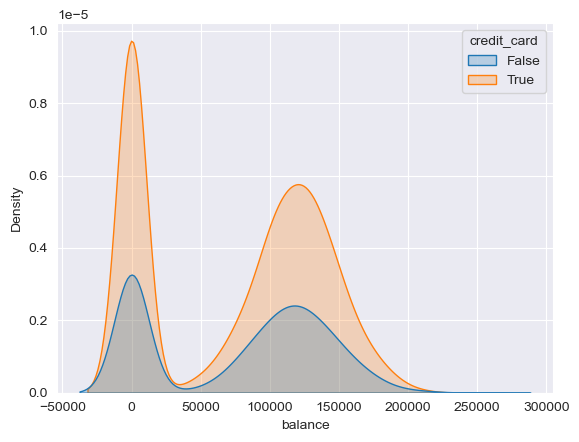

In [15]:
sns.kdeplot(x=data['balance'],hue=data['credit_card'],shade=True)

There is a clear relationship between number of products,and amount of customers using them.We do not posses data on types of products,but there might be a relation between type of product,and drop in profits on it(unless it is not a special type of product,with high ROI but low rate of popularity)

<AxesSubplot:xlabel='products_number', ylabel='Count'>

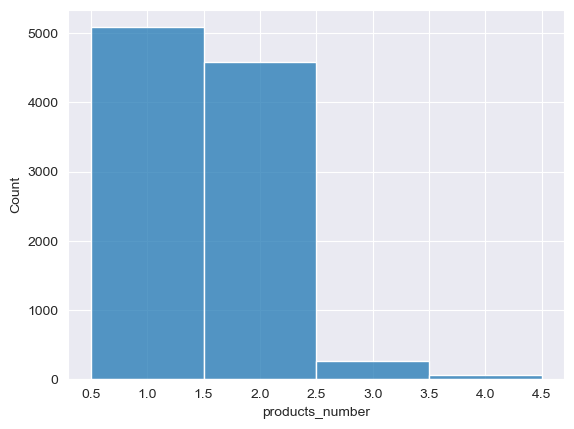

In [16]:
sns.histplot(data['products_number'])